In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [74]:
# import matplotlib.font_manager as fm
# font_path = 'C://Windows//Fonts//JejuMyeongjo.ttf'
# font = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font',family=font)

# 헬스장의 성별 - 연령대별 선호 운동의 수치 및 해당 운동의 칼로리 소모량 정리

In [75]:
# #노트북 데이터 불러오기
# gym_df = pd.read_csv('C:\Workspaces\ml_worspace\Choisoovin\data\gym_members_exercise_tracking.csv')
# gym_df

In [76]:
#데스크탑 데이터 불러오기
gym_df = pd.read_csv('C:/Users/w1945/OneDrive/바탕 화면/code/ML/Choisoovin/data/gym_members_exercise_tracking.csv')
gym_df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [77]:
#데이터 보여주기
gym_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [78]:
# 데이터 정보
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [79]:
#데이터 일괄 개요
gym_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [80]:
#데이터 결측치 확인
gym_df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [81]:
#운동 유형별 누계 확인
gym_df['Workout_Type'].value_counts()

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

In [82]:
#연령대 범주화
def categorize_age(age):
    match age//10:
        case 0 : return '0대'
        case 1 : return '10대'
        case 2 : return '20대'
        case 3 : return '30대'
        case 4 : return '40대'
        case 5 : return '50대'
    
#연령대 컬럼 추가.
gym_df['Agegroup']=gym_df['Age'].apply(categorize_age)
gym_df[['Age','Agegroup']]

,Age,Agegroup
0,56,50대
1,46,40대
2,32,30대
3,25,20대
4,38,30대
...,...,...
968,24,20대
969,25,20대
970,59,50대
971,32,30대


findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not

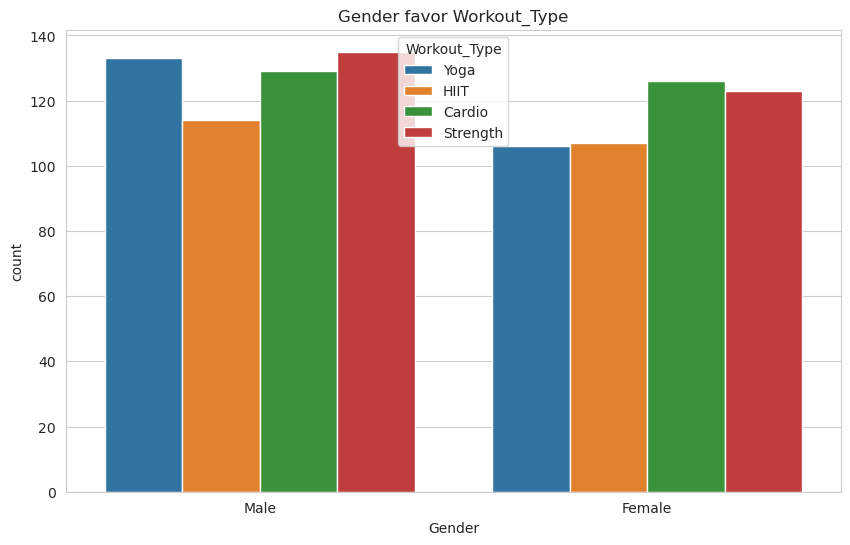

findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
C:\Users\w1945\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.

findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMy

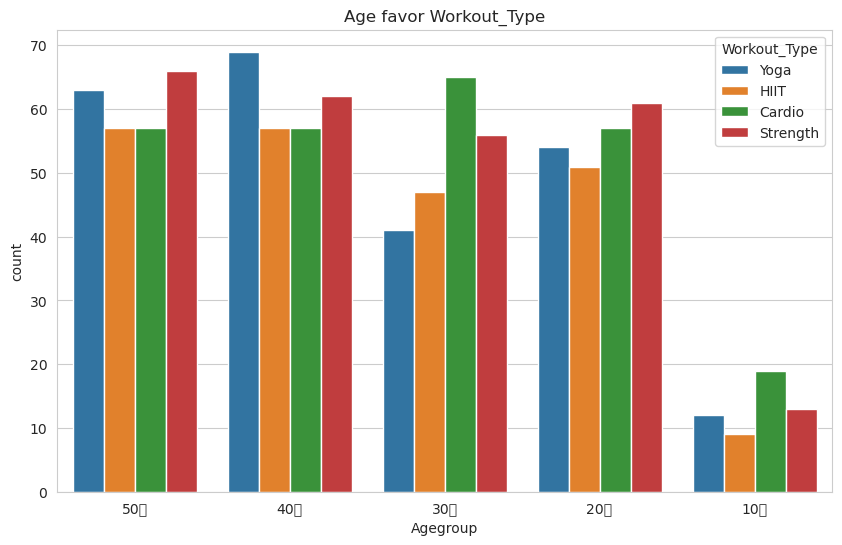

In [83]:
#운동 선호도
plt.figure(figsize=(10, 6))  
sns.countplot(data=gym_df, x='Gender', hue='Workout_Type')
plt.title('Gender favor Workout_Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=gym_df, x='Agegroup', hue='Workout_Type')
plt.title('Age favor Workout_Type')
plt.show()

In [84]:
import plotly.express as px

#운동 형태 별 지속 시간동안 칼로리 소모양 산점도
fig = px.scatter(gym_df, x='Calories_Burned', y='Session_Duration (hours)', color='Workout_Type',title='운동 형태 별 지속 시간동안 칼로리 소모양 산점도')

fig.show()


In [85]:
# 위 산점도를 성별과 연령대 별로 나눈 산점도
fig = px.scatter(gym_df, x='Calories_Burned', y='Session_Duration (hours)', 
                 color='Workout_Type', facet_row='Gender', facet_col='Agegroup', 
                 title="운동 형태 별 지속 시간과 칼로리 소모량 (성별, 연령대 별)")
# y축 라벨 회전 설정 (예: 45도)
fig.update_yaxes(tickangle=45)
fig.show()

In [86]:
#전처리를 위한 데이터 가공
def convert_age_group_to_numeric(age_group):
    if age_group == '10대':
        return 10
    elif age_group == '20대':
        return 20
    elif age_group == '30대':
        return 30
    elif age_group == '40대':
        return 40
    elif age_group == '50대':
        return 50

# 변환 적용
gym_df['Age_numeric'] = gym_df['Agegroup'].apply(convert_age_group_to_numeric)

# 올바르게 인식하기 위한 자료형 변환
gym_df['Age_numeric'] = gym_df['Age_numeric'].astype(float) 

In [107]:
#성별 float 자료형으로 변환
def gendrer_to_numeric(gender):
    if gender == 'Male':
        return 1
    elif gender == 'Female':
        return 2

gym_df['Gender_numeric'] = gym_df['Gender'].apply(gendrer_to_numeric)

gym_df['Gender_numeric'] = gym_df['Gender_numeric'].astype(float)

In [ ]:
def Workout_type_numeric(workout_type):
    if workout_type == 'Yoga':
        return 1
    elif workout_type == 'Cardio':
        return 2
    elif workout_type == 'HIIT':
        return 3
    elif _ :
        return 4
    
gym_df['Workout_Type'] = gym_df['Workout_Type'].apply(gendrer_to_numeric)

gym_df['Workout_Type'] = gym_df['Workout_Type'].astype(float)

In [110]:
corr_matrix = gym_df[['Age','Session_Duration (hours)','Calories_Burned','Gender_numeric']].corr(numeric_only=True)
corr_matrix

,Age,Session_Duration (hours),Calories_Burned,Gender_numeric
Age,1.000000,-0.019912,-0.154679,-0.027175
Session_Duration (hours),-0.019912,1.000000,0.908140,0.012200
Calories_Burned,-0.154679,0.908140,1.000000,-0.150646
Gender_numeric,-0.027175,0.012200,-0.150646,1.000000


findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not found.
findfont: Font family 'JejuMyeongjo' not

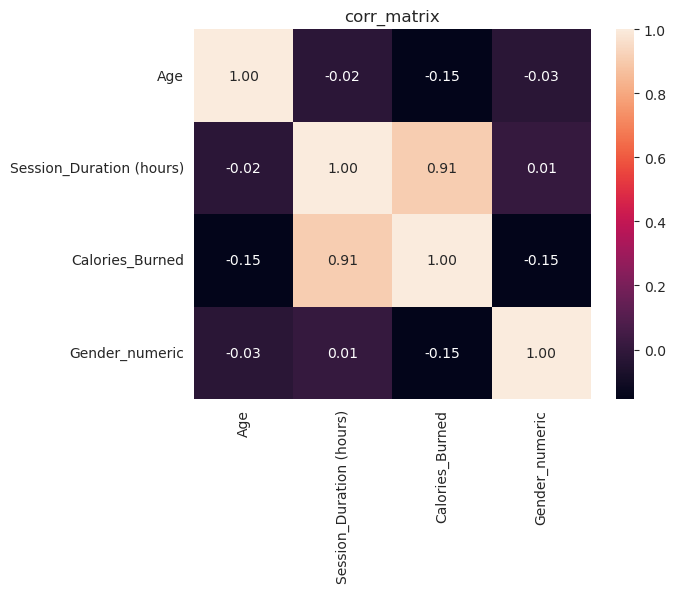

In [111]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title("corr_matrix")
plt.show()

In [91]:
X = gym_df[['Age_numeric','Session_Duration (hours)','Calories_Burned','Gender_numeric']]
y = gym_df['Workout_Type']
X.shape, y.shape

((973, 4), (973,))

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [93]:
# 훈련 / 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((729, 4), (244, 4), (729,), (244,))

In [94]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
#점수
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)
print(lr.score(X_train_scaled, y_train),lr.score(X_test_scaled, y_test))


0.26474622770919065 0.2786885245901639


C:\Users\w1945\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\w1945\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

C:\Users\w1945\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array(['Cardio', 'Yoga', 'Cardio', 'Cardio', 'Yoga', 'Strength', 'Cardio',
       'Cardio', 'Cardio', 'Cardio', 'Strength', 'Cardio', 'Cardio',
       'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Strength', 'Cardio',
       'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio',
       'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio',
       'Cardio', 'Cardio', 'Strength', 'Strength', 'Yoga', 'Cardio',
       'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio',
       'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio',
       'Cardio', 'Cardio', 'Strength', 'Cardio', 'Cardio', 'Cardio',
       'Strength', 'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Cardio',
       'Cardio', 'Yoga', 'Yoga', 'Cardio', 'Cardio', 'Cardio', 'Strength',
       'Cardio', 'Yoga', 'Yoga', 'Cardio', 'Cardio', 'Yoga', 'Yoga',
       'Cardio', 'Cardio', 'Cardio', 'Cardio', 'Strength', 'Cardio',
       'Cardio', 'Cardio', 'Strength', 'Cardio', 'Cardio', 'Cardio',
       'Cardio', 'Cardio', 'Ca